In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
data = pd.read_csv('/content/gym_members_exercise_tracking.csv')

# Visualizar as primeiras linhas
print(data.head())

# Informações gerais sobre o dataset
print(data.info())

# Estatísticas descritivas
print(data.describe())

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

In [215]:
# Verificar valores nulos
print(data.isnull().sum())

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


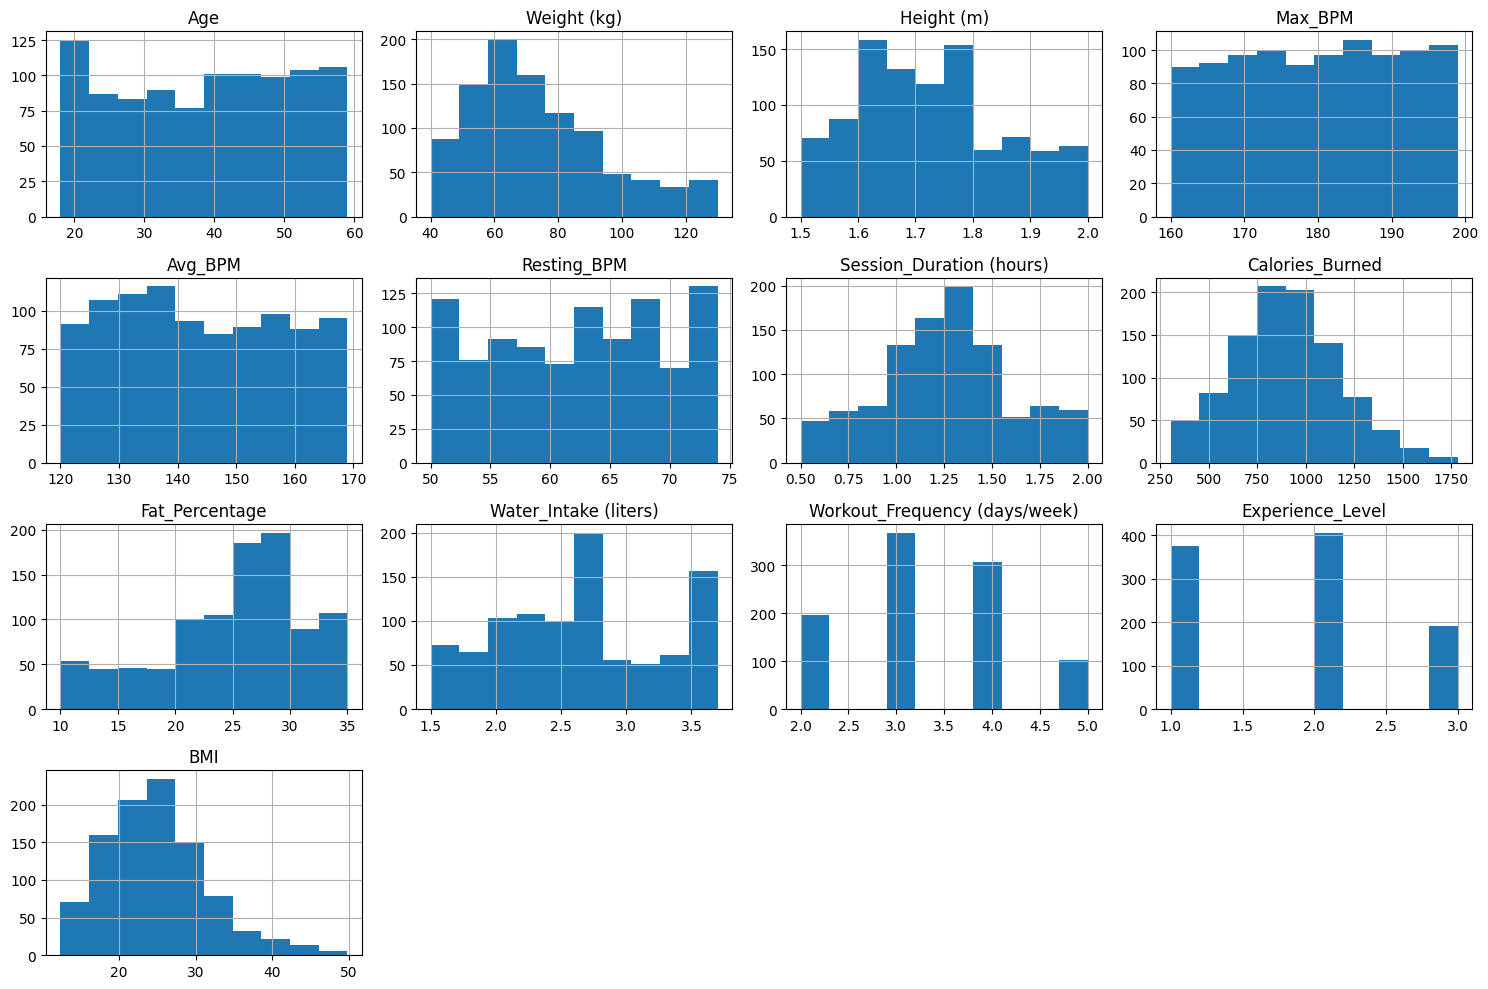

In [216]:
# Lista de colunas numéricas
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Plotar histogramas
data[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

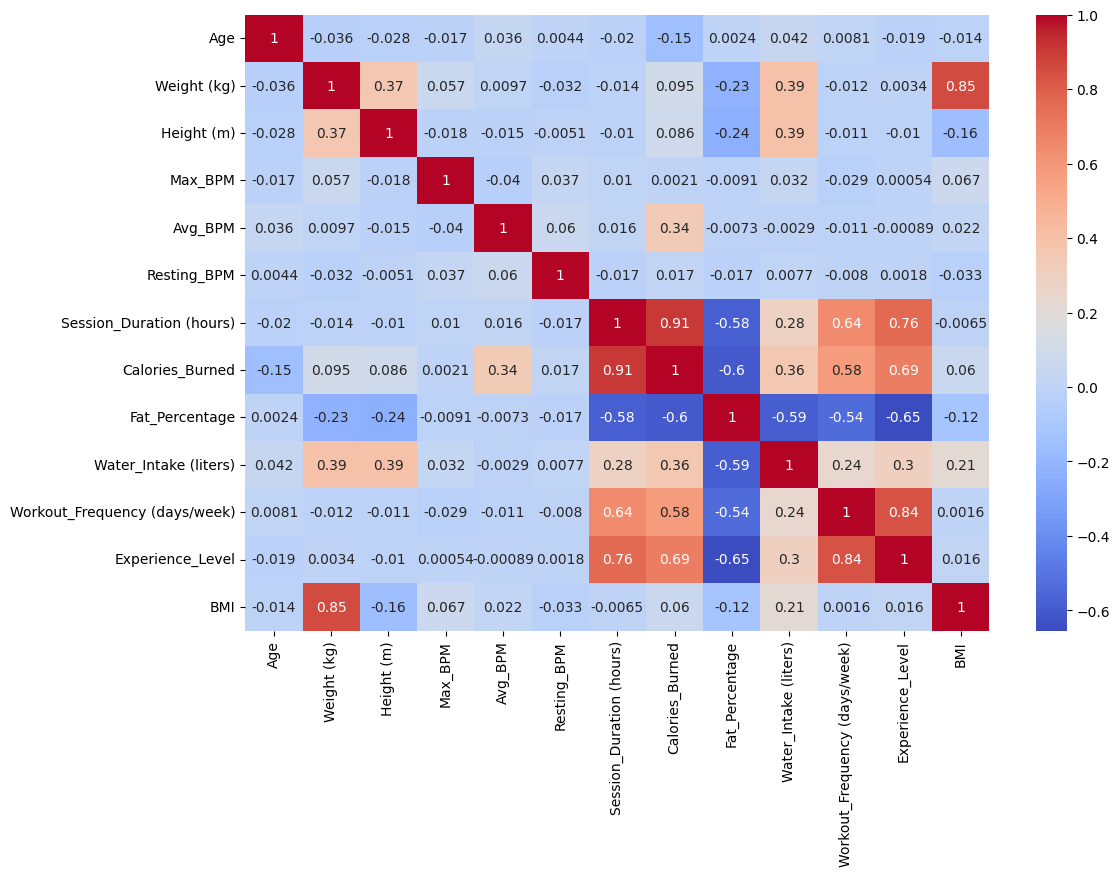

In [217]:
# Matriz de correlação
corr_matrix = data[numerical_cols].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [218]:
from sklearn.preprocessing import StandardScaler

# Selecionando as colunas numéricas para a clusterização
features = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
            'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
            'Fat_Percentage', 'Water_Intake (liters)',
            'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']

# Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])

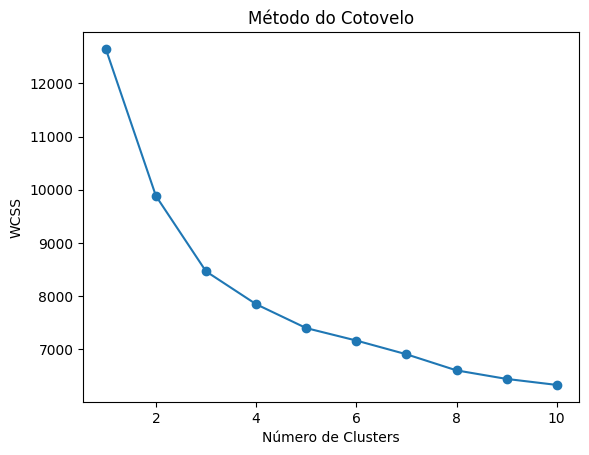

In [219]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculando a inércia para diferentes números de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotando o gráfico do método do cotovelo
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [220]:
# Aplicando o K-Means com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionando os clusters ao dataset original
data['Cluster'] = kmeans.labels_

# Visualizar os primeiros resultados
print(data[['Age', 'Weight (kg)', 'Height (m)', 'Cluster']].head())

   Age  Weight (kg)  Height (m)  Cluster
0   56         88.3        1.71        0
1   46         74.9        1.53        3
2   32         68.1        1.66        3
3   25         53.2        1.70        1
4   38         46.1        1.79        1


In [221]:
# Selecionar apenas as colunas numéricas para o resumo estatístico
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Agrupar por cluster e calcular as médias apenas para as colunas numéricas
cluster_summary = data[numerical_columns].groupby(data['Cluster']).mean()
print(cluster_summary)

               Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
Cluster                                                               
0        38.270833    73.376562    1.724323  180.369792  143.338542   
1        37.951220    62.278537    1.695659  179.268293  139.595122   
2        38.311881   106.522277    1.794802  181.237624  143.970297   
3        39.497326    62.801337    1.697433  179.240642  146.163102   

         Resting_BPM  Session_Duration (hours)  Calories_Burned  \
Cluster                                                           
0          62.411458                  1.757448      1265.213542   
1          62.551220                  0.876293       600.482927   
2          61.747525                  1.148614       869.544554   
3          62.203209                  1.265802       907.240642   

         Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  \
Cluster                                                                         
0       

In [222]:
# Distribuição de valores categóricos por cluster
gender_distribution = data.groupby(['Cluster', 'Gender']).size().unstack()
workout_distribution = data.groupby(['Cluster', 'Workout_Type']).size().unstack()

print("Distribuição de Gender por Cluster:")
print(gender_distribution)

print("\nDistribuição de Workout_Type por Cluster:")
print(workout_distribution)

Distribuição de Gender por Cluster:
Gender   Female   Male
Cluster               
0          90.0  102.0
1         132.0   73.0
2           NaN  202.0
3         240.0  134.0

Distribuição de Workout_Type por Cluster:
Workout_Type  Cardio  HIIT  Strength  Yoga
Cluster                                   
0                 45    49        45    53
1                 64    43        52    46
2                 57    46        47    52
3                 89    83       114    88


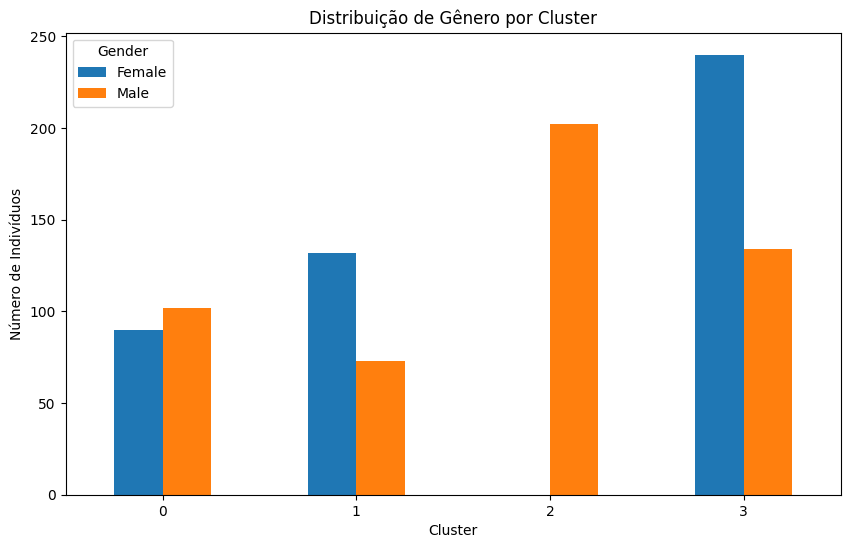

In [223]:
# Distribuição de Gênero por Cluster
gender_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição de Gênero por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Indivíduos')
plt.xticks(rotation=0)
plt.show()

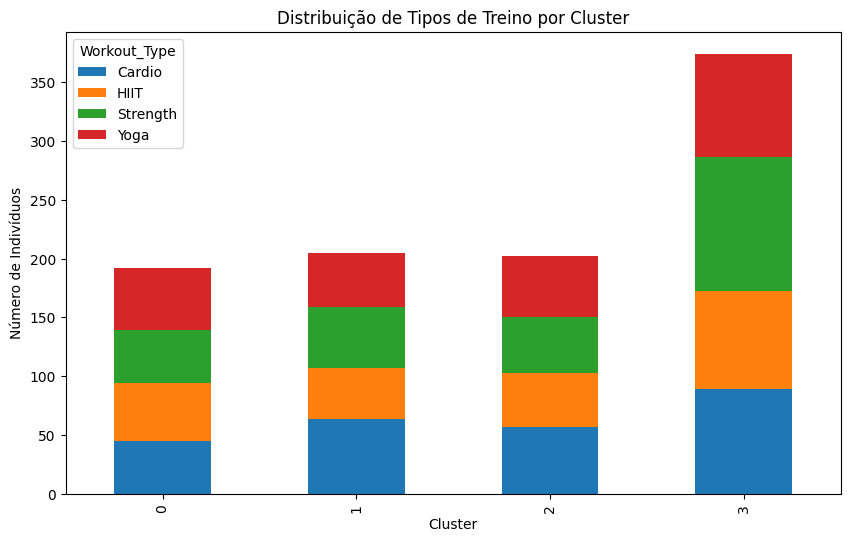

In [224]:
# Distribuição de Workout_Type por Cluster
workout_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribuição de Tipos de Treino por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Indivíduos')
plt.legend(title='Workout_Type')
plt.show()

In [225]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05)  # Contaminação define a proporção de outliers
outliers = iso.fit_predict(X_scaled)
X_filtered = X_scaled[outliers == 1]  # Filtrar apenas dados normais

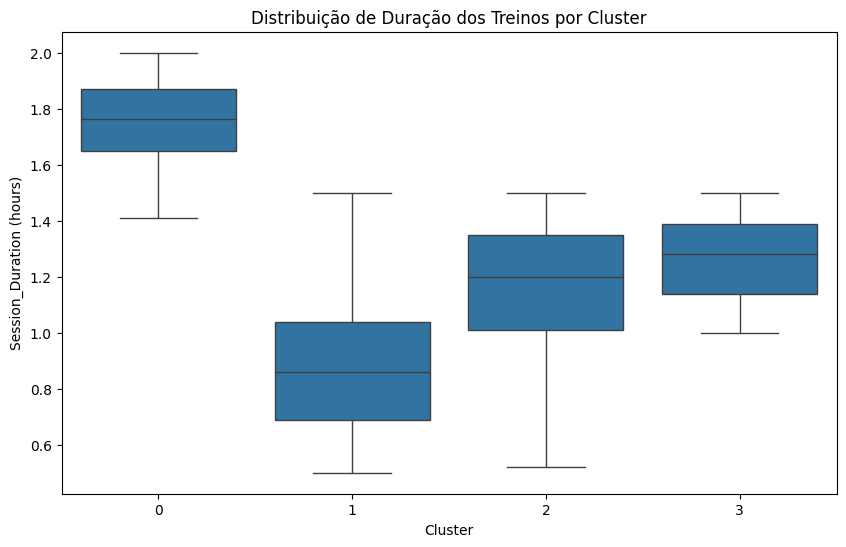

In [226]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Session_Duration (hours)', data=data)
plt.title('Distribuição de Duração dos Treinos por Cluster')
plt.show()

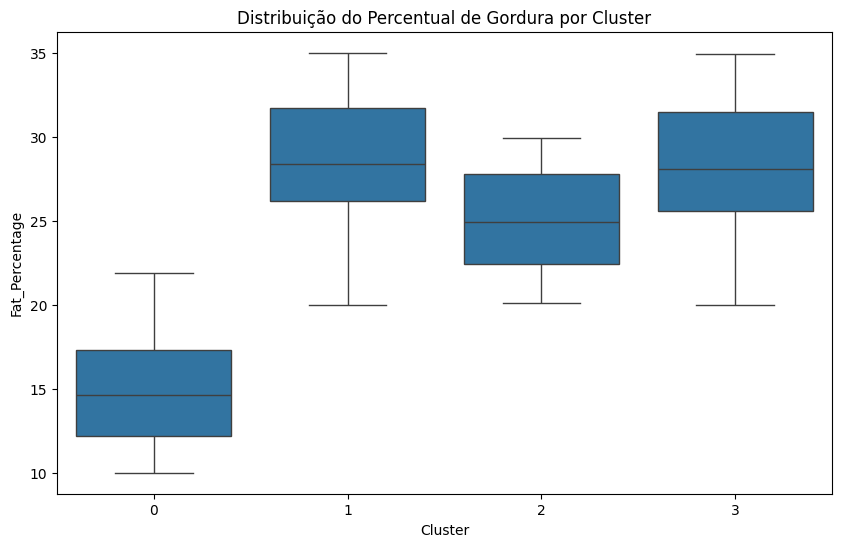

In [227]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Fat_Percentage', data=data)
plt.title('Distribuição do Percentual de Gordura por Cluster')
plt.show()

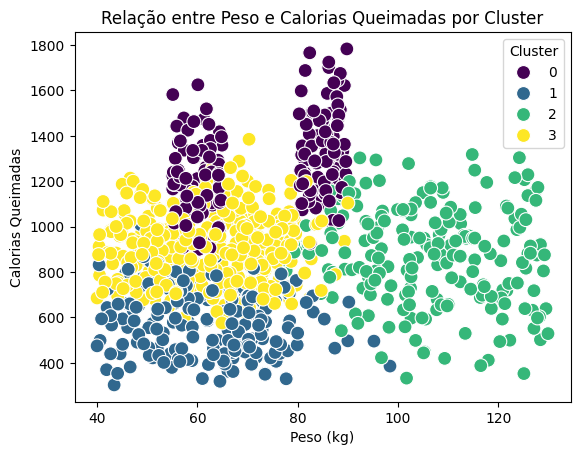

In [228]:
sns.scatterplot(data=data, x='Weight (kg)', y='Calories_Burned', hue='Cluster', palette='viridis', s=100)
plt.title('Relação entre Peso e Calorias Queimadas por Cluster')
plt.xlabel('Peso (kg)')
plt.ylabel('Calorias Queimadas')
plt.show()

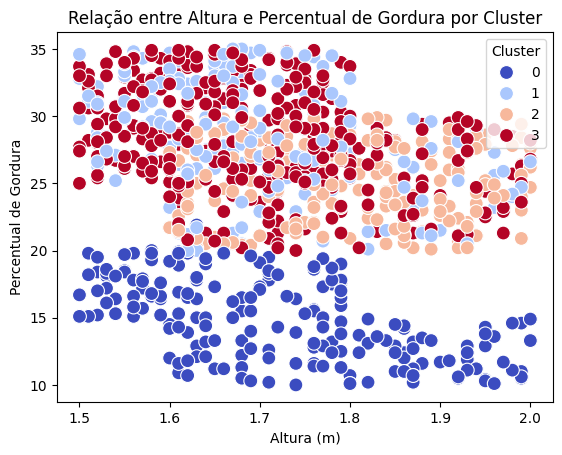

In [230]:
sns.scatterplot(data=data, x='Height (m)', y='Fat_Percentage', hue='Cluster', palette='coolwarm', s=100)
plt.title('Relação entre Altura e Percentual de Gordura por Cluster')
plt.xlabel('Altura (m)')
plt.ylabel('Percentual de Gordura')
plt.show()

In [231]:
 from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduzir para 2 dimensões
X_pca = pca.fit_transform(X_scaled)

# Aplicar K-Means novamente
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Calcular Silhouette Score
score = silhouette_score(X_pca, labels)
print(f'PCA + K-Means Silhouette Score: {score:.2f}')

PCA + K-Means Silhouette Score: 0.44


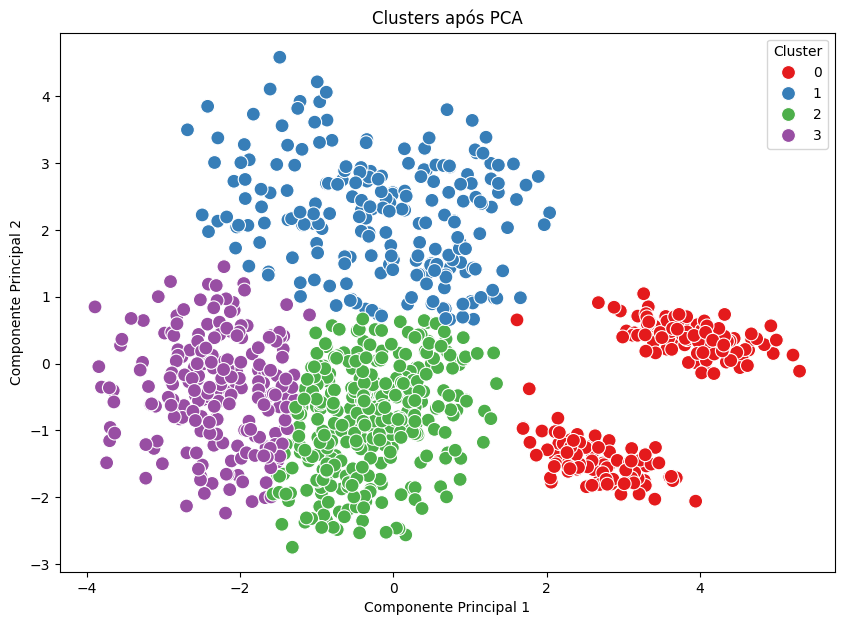

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar clusters após o PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_, palette='Set1', s=100)
plt.title('Clusters após PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

In [237]:
def recommend_training(user_data, model, scaler, pca, recommendations):
    """
    Recomenda treinos com base nos dados do usuário e no modelo de clusterização.

    Parâmetros:
    - user_data: dicionário com as características do usuário.
    - model: modelo K-Means treinado.
    - scaler: objeto StandardScaler usado no treinamento.
    - pca: objeto PCA usado no treinamento.
    - recommendations: dicionário com as recomendações para cada cluster.

    Retorna:
    - Recomendações de treino para o usuário.
    """
    try:
        # Verificar se o modelo foi treinado
        if model is None:
            raise ValueError("O modelo K-Means não foi treinado!")

        # Converter os dados do usuário para DataFrame
        user_df = pd.DataFrame([user_data])

        # Verificar se todas as colunas necessárias estão presentes
        expected_columns = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
                            'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
                            'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)',
                            'Experience_Level', 'BMI']
        if not all(col in user_df.columns for col in expected_columns):
            raise ValueError(f"Faltam colunas esperadas nos dados do usuário: {expected_columns}")

        # Padronizar os dados do usuário
        user_scaled = scaler.transform(user_df)

        # Aplicar o PCA para reduzir as dimensões
        user_pca = pca.transform(user_scaled)

        # Predizer o cluster do usuário
        cluster = model.predict(user_pca)[0]

        # Obter as recomendações para o cluster do usuário
        user_recommendations = recommendations.get(cluster, [])

        return user_recommendations

    except Exception as e:
        return f"Erro: {str(e)}"

In [238]:
recommendations = {
    0: ["Treino de força 5x por semana", "Aulas de spinning", "Treino funcional pesado"],
    1: ["Cardio de alta intensidade", "Treinos HIIT", "Circuitos rápidos 5x por semana"],
    2: ["Treino misto: força e cardio 4x por semana", "Corrida moderada", "Yoga para recuperação"],
    3: ["Yoga 3x por semana", "Treinos leves de mobilidade", "Caminhadas diárias"]
}

In [248]:
# Dados de um novo usuário
new_user = {
    'Age': 20,
    'Weight (kg)': 55,
    'Height (m)': 1.65,
    'Max_BPM': 160,
    'Avg_BPM': 110,
    'Resting_BPM': 70,
    'Session_Duration (hours)': 1.5,
    'Calories_Burned': 450,
    'Fat_Percentage': 18,
    'Water_Intake (liters)': 2.5,
    'Workout_Frequency (days/week)': 5,
    'Experience_Level': 2,
    'BMI': 14.5
}

# Prever recomendações para o novo usuário
training_recommendations = recommend_training(new_user, kmeans, scaler, pca, recommendations)
print("Recomendações de treino para o usuário:", training_recommendations)

Recomendações de treino para o usuário: ['Treino misto: força e cardio 4x por semana', 'Corrida moderada', 'Yoga para recuperação']
